# Validation and Learning Curves

## Cross validation for Support Vector Machines

In [16]:
import pandas as pd
import sklearn

from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer(as_frame=True)
data = breast_cancer.data
target = breast_cancer.target

In [17]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The goal of this notebook is to carry out the following experiments:

* train and test a support vector machine (SVM) classifier using cross validation;
* study the effect of the gamma parameter of this classifier using a validation curve;
* use a learning curve to determine whether adding new samples to the dataset would help when building a classifier.

Here we use a support vector machine (SVM) classifier. In its simplest form, an SVM classifier is a linear classifier that behaves similarly to logistic regression. The optimizations used to find the optimal weights of the linear model are different, but we do not need to know these details for this exercise.

Moreover, this classifier can become more flexible/expressive by using a so-called "kernel" that makes the model non-linear. Again, no understanding of the mathematics is necessary for this exercise.

We will use an RBF kernel where a `gamma` parameter controls the flexibility of the model.

First, let's create a predictive pipeline consisting of:

  * a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) with default parameters;
  * a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) where the `kernel` parameter can be set to `"rbf"`. Note that this is the default value.

In [19]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC(kernel="rbf"))

Evaluate the generalization performance of your model by cross validation with a `ShuffleSplit` scheme. You can use
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
and pass a
[`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
to the `cv` parameter. Set only `random_state=0` in `ShuffleSplit` and leave the other parameters at their default values.

In [20]:
# Write your code here.
from sklearn.model_selection import cross_validate, ShuffleSplit
cv = ShuffleSplit(random_state=0)
scores = cross_validate(model, data, target, cv=cv)
print(scores['test_score'])

[1.         1.         0.96491228 0.98245614 1.         0.98245614
 0.98245614 0.98245614 0.96491228 0.98245614]


As mentioned earlier, the `gamma` parameter is one of the parameters that controls underfitting and overfitting in support vector machines with an RBF kernel.

Evaluate the effect of the `gamma` parameter using
[`sklearn.model_selection.ValidationCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ValidationCurveDisplay.html).
You can leave `scoring=None` by default, which is equivalent to
`scoring='accuracy'` for classification problems. You can vary `gamma` between
`10e-3` and `10e2` by generating samples on a logarithmic scale using
`np.logspace(-3, 2, num=30)`.

Since we are manipulating a `Pipeline`, the parameter name is `svc__gamma`
instead of just `gamma`. You can retrieve the parameter name using
`model.get_params().keys()`. We will go into more detail about accessing and tuning hyperparameters in the next section.

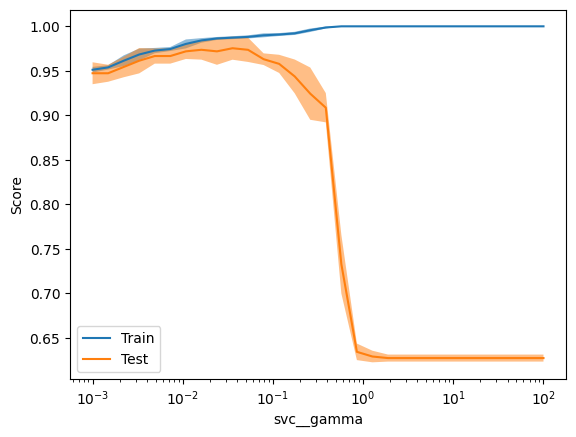

In [21]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay
param_range = np.logspace(-3, 2, num=30)
ValidationCurveDisplay.from_estimator(
    model, data, target, param_name="svc__gamma", param_range=param_range
)

Now, you can perform an analysis to check if adding new samples to the dataset could help our model generalize better. Compute the learning curve (using
[`sklearn.model_selection.LearningCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LearningCurveDisplay.html)
by computing training and test scores for different training set sizes. Plot the training and test scores as a function of the number of samples.

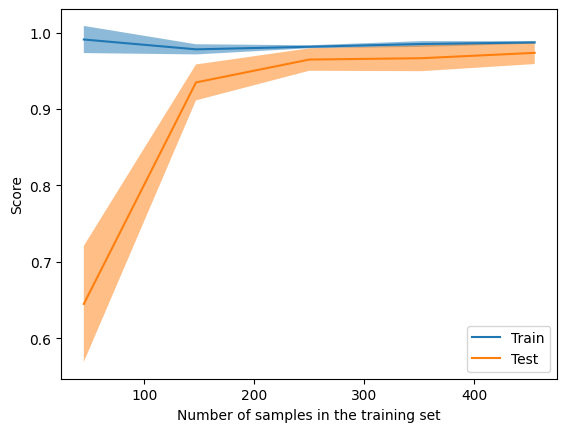

In [22]:
from sklearn.model_selection import LearningCurveDisplay
LearningCurveDisplay.from_estimator(model, data, target)

## Cross validation for decision trees

First, let's create a classifier based on a decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

Create a `StratifiedKFold` cross-validation object. Then use it in the `cross_val_score` function to evaluate the decision tree. We will first use accuracy as the scoring function. Explicitly use the `scoring` parameter of `cross_val_score` to compute accuracy (even though it is the default score). Check its documentation to see how to do this.

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold()
scores = cross_val_score(tree, data, target, cv=cv, scoring="accuracy")
print(scores)

[0.9122807  0.90350877 0.92105263 0.94736842 0.89380531]


Repeat the experiment with `balanced_accuracy`.

In [25]:
scores = cross_val_score(tree, data, target, cv=cv, scoring="balanced_accuracy")
print(scores)

[0.9158205  0.89960694 0.88690476 0.95734127 0.91985245]


We will now add a bit of complexity. We want to compute the precision of our model.

You can read more about this here:
[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

We need to specify the positive label, which in our case is the `donated` class. We will show that computing precision without providing the positive label will not be supported by scikit-learn because it is indeed ambiguous.

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
try:
    scores = cross_val_score(tree, data, target, cv=10, scoring="precision")
except ValueError as exc:
    print(exc)

We get an exception because the default scorer has its positive label set to one (`pos_label=1`), which is not our case (our positive label is "donated"). In this case, we need to create a scorer using the scoring function and the utility function `make_scorer`.

So, import `sklearn.metrics.make_scorer` and `sklearn.metrics.precision_score`. Check their documentation for more information. Finally, create a scorer by calling `make_scorer` using the `precision_score` function and pass the extra parameter `pos_label="donated"`.

In [27]:
from sklearn.metrics import make_scorer, precision_score
scorer = make_scorer(precision_score, pos_label=1)

Now, instead of providing the string `"precision"` to the `scoring` parameter in the `cross_val_score` call, pass the scorer you created above.

In [28]:
scores = cross_val_score(tree, data, target, cv=10, scoring=scorer)
print(scores)

[0.94117647 0.86486486 0.91891892 0.91891892 0.94594595 0.91666667
 0.89473684 0.97142857 1.         1.        ]


`cross_val_score` only computes a single score provided to the `scoring` parameter. The `cross_validate` function allows you to compute multiple scores by passing a list of strings or scorers to the `scoring` parameter, which can be convenient.

Import `sklearn.model_selection.cross_validate` and compute accuracy and balanced accuracy by cross validation. Plot the cross validation scores for both metrics using a box plot.

/var/folders/n8/m5ycpkr13jj_w9jqvc_5djqw0000gp/T/ipykernel_69794/154520575.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results['test_accuracy'], results['test_balanced_accuracy']], labels=["accuracy", "balanced_accuracy"])


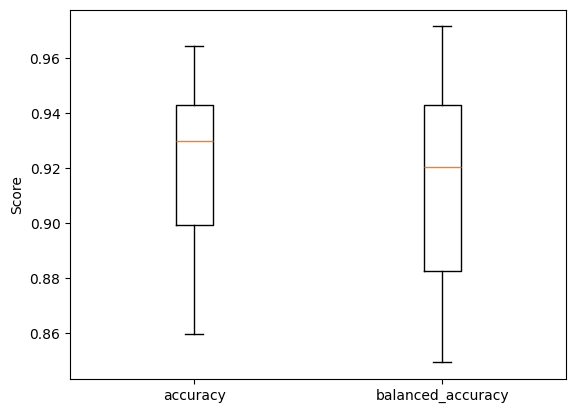

In [29]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
results = cross_validate(tree, data, target, cv=10, scoring=["accuracy", "balanced_accuracy"])
plt.boxplot([results['test_accuracy'], results['test_balanced_accuracy']], labels=["accuracy", "balanced_accuracy"])
plt.ylabel("Score")
plt.show()